In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification

### Using Make Classification function from sklearn to create dataset 

In [2]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,n_clusters_per_class=1 ,random_state=5)

In [3]:
X.shape


(500, 2)

In [4]:
y.shape

(500,)

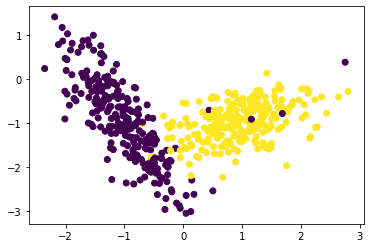

In [5]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.show()

### Performing operations on data and target to prepare it for algorithm

In [6]:
y = y.reshape((-1,1))

In [7]:
ones= np.ones((500,1))
X_ = np.hstack((ones, X))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

### Defining Sigmoid function or Squashing function

In [10]:
def sigmoid(z):
    return 1/ (1 + np.exp(-1*z))

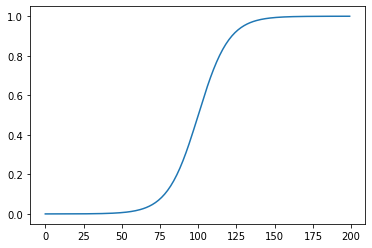

In [11]:
sig = sigmoid(np.arange(-10, 10, 0.1))
plt.plot(sig)

### Defining Logistic Regression hypothesis function or predicting function, error function, gradient and gradient descend or error optimisation function

In [12]:
def hypothesis(X, theta):
    """
    X - np array (m,n)
    theta - np arrary (n, 1)
    """
    return sigmoid(np.dot(X, theta))

In [13]:
def error(X, y, theta):
    """
    params:
        X - np array (m,n)
        y - np array (m,1)
        theta - np arrary (n,1)
    
    return :
        scalar value = loss value
    """
    hypo = hypothesis(X, theta)
    err = np.mean((y*np.log(hypo) + (1-y)*np.log(1- hypo)))
    
    return -err

In [14]:
def gradient(X, y, theta):
    """
    X - (m,n)
    y - (m,1)
    theta - (n,1)
    
    return - (n, 1)
    """
    
    hypo = hypothesis(X, theta)
    grad = (np.dot(X.T,(hypo - y)))
    return grad/X.shape[0]


In [15]:
def gradient_descent(X, y, lr = 0.5, max_iter = 300):
    theta = np.zeros((X.shape[1], 1))
    
    error_list = []
    
    for _ in range(max_iter):
        e = error(X, y, theta)
        error_list.append(e)
        
        grad = gradient(X, y, theta)
        
        #Update Rule
        theta = theta - lr*grad
    
    return (theta, error_list)

In [16]:
opt_theta, error_list = gradient_descent(X_train, y_train)

### Plotting to see error with changing theta

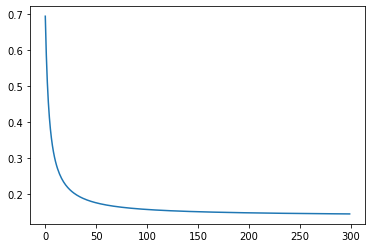

In [17]:
plt.plot(error_list)

In [18]:
opt_theta

array([[1.0374216 ],
       [4.19843548],
       [0.57863668]])

In [19]:
x1 = np.array([-1, 1])
x2 = - (opt_theta[0] + opt_theta[1]*x1) / opt_theta[2]

In [20]:
x2

array([ 5.46286467, -9.04860901])

In [21]:
y = y.reshape((-1,))
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))
y.shape

(500,)

### Plotting to see logistic regression line predicted vs Data points

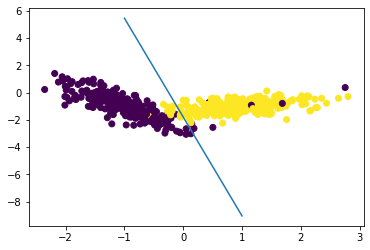

In [22]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.plot(x1, x2)
plt.show()

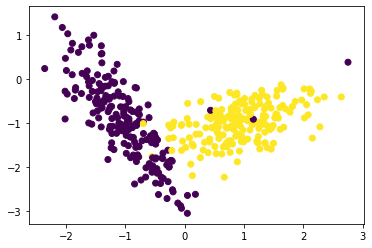

In [23]:
plt.scatter(X_train[:, 1], X_train[:,2], c= y_train)
plt.show()

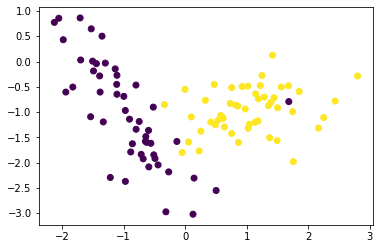

In [24]:
plt.scatter(X_test[:, 1], X_test[:,2], c= y_test)
plt.show()

## Prediction on test set

In [25]:
y_pred  = np.round(hypothesis(X_test, opt_theta)).astype('int')

In [42]:
y_test = y_test.reshape(-1,1)

## Calculating accuracy

In [43]:
def accuracy(y_test, y_pred):
    return (y_pred == y_test).mean()

In [44]:
accuracy(y_test, y_pred)

0.95